In [6]:
import pandas as pd
import numpy as np
from scipy.spatial import KDTree

In [7]:
merged_df = pd.read_csv('../data/WATER_METADATA_PHYTOPLANKTON.csv', low_memory=False)

# Trying XGBoost

In [8]:
site_EA10HS = merged_df[merged_df['siteid']=='E-A10HS']
site_EA10HS.head()

,siteid,sitename,country,seaname,decimallatitude,decimallongitude,datecollected,Temperature,pH,Dissolved oxygen,...,sampleid,basisofrecord,minimumdepthinmeters,maximumdepthinmeters,taxaname,taxanameid,samplingeffort,parameter,parameter_value,parameter_standardunit
0,E-A10HS,Ondarroa (Embarcadero). High Tide. Surface,ES,Bay of Biscay,43.319883,-2.420973,2002-04-24,16.5,8.34,8.294,...,E-A10_20020424,MaterialSample,0,0.5,Chaetoceros danicus,149120,125 ml,Abundance,0.02,cel/ml
1,E-A10HS,Ondarroa (Embarcadero). High Tide. Surface,ES,Bay of Biscay,43.319883,-2.420973,2002-04-24,16.5,8.34,8.294,...,E-A10_20020424,MaterialSample,0,0.5,Chaetoceros salsugineum,621740,125 ml,Abundance,1.72,cel/ml
2,E-A10HS,Ondarroa (Embarcadero). High Tide. Surface,ES,Bay of Biscay,43.319883,-2.420973,2002-04-24,16.5,8.34,8.294,...,E-A10_20020424,MaterialSample,0,0.5,Eutreptiella,17657,125 ml,Abundance,6.40,cel/ml
3,E-A10HS,Ondarroa (Embarcadero). High Tide. Surface,ES,Bay of Biscay,43.319883,-2.420973,2002-04-24,16.5,8.34,8.294,...,E-A10_20020424,MaterialSample,0,0.5,Gyrodinium dominans,109851,125 ml,Abundance,0.02,cel/ml
4,E-A10HS,Ondarroa (Embarcadero). High Tide. Surface,ES,Bay of Biscay,43.319883,-2.420973,2002-04-24,16.5,8.34,8.294,...,E-A10_20020424,MaterialSample,0,0.5,Leptocylindrus,149038,125 ml,Abundance,0.32,cel/ml


In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [9]:

# trying out for site EA10HS
df = site_EA10HS

df = df.sort_values(by="datecollected")

# splitting into train and test data  
split_point = int(len(df) * 0.8)  # 80% train, 20% test

train = df.iloc[:split_point]
test = df.iloc[split_point:]

# Select Features and Target Variable
X_train = train[["pH", "Temperature"]]
y_train = train["parameter_value"] # parameter_value = abundance
X_test = test[["pH", "Temperature"]]
y_test = test["parameter_value"]

# Convert to XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


Mean Squared Error: 109657.6592
R² Score: -0.0071


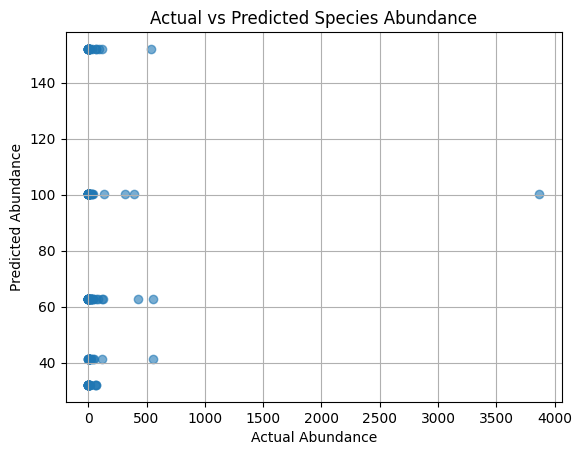

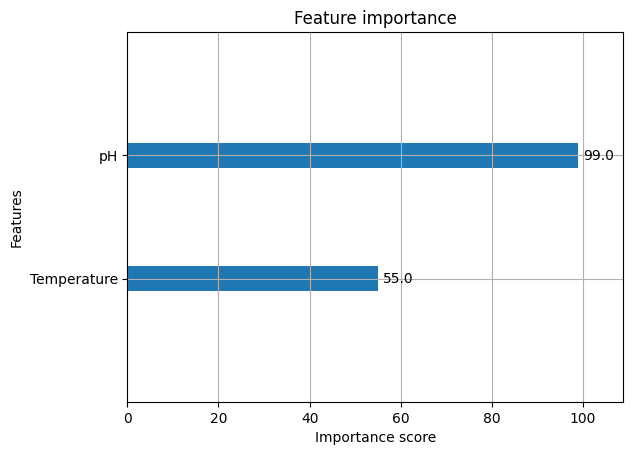

In [10]:

# Train the XGBoost Model
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

model = xgb.train(params, dtrain, num_boost_round=10)

# Make Predictions
y_pred = model.predict(dtest)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs. Predicted Values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Abundance")
plt.ylabel("Predicted Abundance")
plt.title("Actual vs Predicted Species Abundance")
plt.grid(True)
plt.show()

# Feature Importance Plot
xgb.plot_importance(model)
plt.show()
